**Author:** Max Aragón <br>
**Affiliation:** INAR | University of Helsinki <br>
**Term:** Summer internship <br>
**Date:** 2022-09-30

<div class="alert alert-block alert-success">
<h2><center>Retrieval of cloud base updrafts using Radar and Lidar </center></h2>

## Load modules

In [1]:
!python --version 

Python 3.9.12


In [2]:
from gliders.plot import *
from gliders.utils import *
from gliders.filter import *
from gliders.updraft import *

## 1. List Cloudnet sites

In [6]:
list_sites('cloudnet')

,id,humanReadableName,type,latitude,longitude,altitude,gaw,dvasId,actrisId,country,countryCode,countrySubdivisionCode
0,bucharest,Bucharest,[cloudnet],44.348,26.029,93,INO,INO,99.0,Romania,RO,None
1,cabauw,Cabauw,[cloudnet],51.968,4.927,-1,CBW,CBW,88.0,Netherlands,NL,None
2,chilbolton,Chilbolton,[cloudnet],51.144,-1.439,85,None,CHI,123.0,United Kingdom,GB,GB-ENG
3,delft,Delft,[cloudnet],51.996,4.379,-4,None,DEL,NaN,Netherlands,NL,None
4,galati,Galați,[cloudnet],45.435,28.037,40,None,GAL,102.0,Romania,RO,None
5,granada,Granada,[cloudnet],37.164,-3.605,680,UGR,GRA,110.0,Spain,ES,None
6,hyytiala,Hyytiälä,[cloudnet],61.844,24.288,174,SMR,SMR,23.0,Finland,FI,None
7,juelich,Jülich,[cloudnet],50.906,6.407,108,JUE,JUE,48.0,Germany,DE,None
8,kenttarova,Kenttärova,[cloudnet],67.988,24.243,342,None,KEN,26.0,Finland,FI,None
9,leipzig,Leipzig,[cloudnet],51.353,12.435,126,LEI,LEI,64.0,Germany,DE,None


## 2. Download Cloudnet



##### *Download_cloudnet* function simplifies downloading _classification_ and _categorize_ files from any cloudnet site, while generating 4 directories:


In [3]:
# Download for one site

download_cloudnet(site='hyytiala', start='2022-06-25', end='2022-06-30')

100% [......................................................] 7677925 / 7677925 hyytiala is done!


In [4]:
# Check downloaded data

!ls Products_hyytiala/Classification | head -5

20140301_hyytiala_classification.nc
20140304_hyytiala_classification.nc
20140306_hyytiala_classification.nc
20140307_hyytiala_classification.nc
20140406_hyytiala_classification.nc


In [5]:
!ls Products_hyytiala/Categorize | head -5

20140301_hyytiala_categorize.nc
20140304_hyytiala_categorize.nc
20140306_hyytiala_categorize.nc
20140307_hyytiala_categorize.nc
20140406_hyytiala_categorize.nc


## 3. Find updraft cases

***

##### *keep_updrafts* generates and finds potentially good updraft cases, returning the following:

1. output 1 = cloud base updraft for the raw data (droplets, ice, drizzle)
2. output 2 = cloud base updraft with ice cloud filtered (droplets, drizzle)
3. output 3 = cloud base updraft with ice cloud and drizzle filtered (droplets)

***

In [6]:
classification_path = 'Products_hyytiala/Classification'
categorize_path = 'Products_hyytiala/Categorize'
updraft_path = 'Products_hyytiala/Updraft'

In [7]:
keep_updrafts(classification_path, categorize_path, updraft_path)

In [8]:
# List potentially good updraft cases

!ls Products_hyytiala/Classification 

20140301_hyytiala_classification.nc 20220529_hyytiala_classification.nc
20140304_hyytiala_classification.nc 20220530_hyytiala_classification.nc
20140306_hyytiala_classification.nc 20220627_hyytiala_classification.nc
20140307_hyytiala_classification.nc 20220628_hyytiala_classification.nc
20140406_hyytiala_classification.nc 20220629_hyytiala_classification.nc
20140407_hyytiala_classification.nc 20220826_hyytiala_classification.nc
20140412_hyytiala_classification.nc 20220827_hyytiala_classification.nc
20140413_hyytiala_classification.nc 20220828_hyytiala_classification.nc
20140414_hyytiala_classification.nc 20220829_hyytiala_classification.nc
20140421_hyytiala_classification.nc 20220830_hyytiala_classification.nc
20220528_hyytiala_classification.nc


## 4. Data visualization

***

##### *generate_figure* is a CloudnetPy native function for plotting data.

***

In [9]:
# Location of the files
classification_file = 'Products_hyytiala/Classification/20220827_hyytiala_classification.nc'
categorize_file = 'Products_hyytiala/Categorize/20220827_hyytiala_categorize.nc'

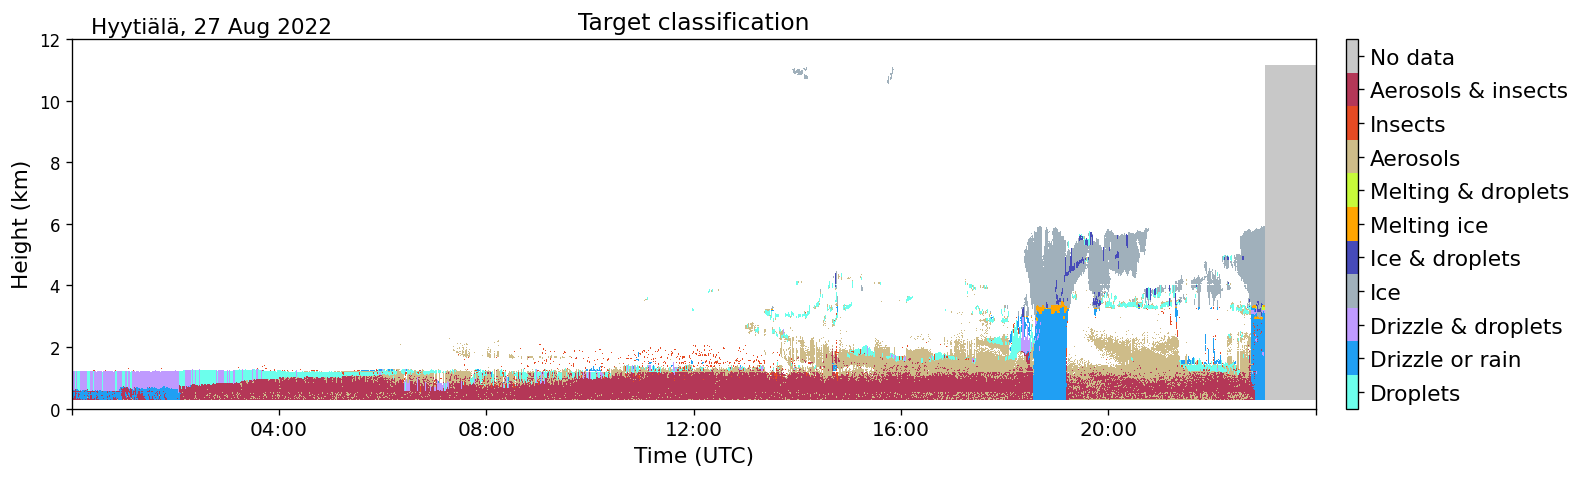

In [10]:
generate_figure(classification_file, ['target_classification'])
plt.show()

***

##### *plot_raw* classifies and visualize data into warm clouds (droplets), ice clouds (ice), and precipitation (drizzle).

***

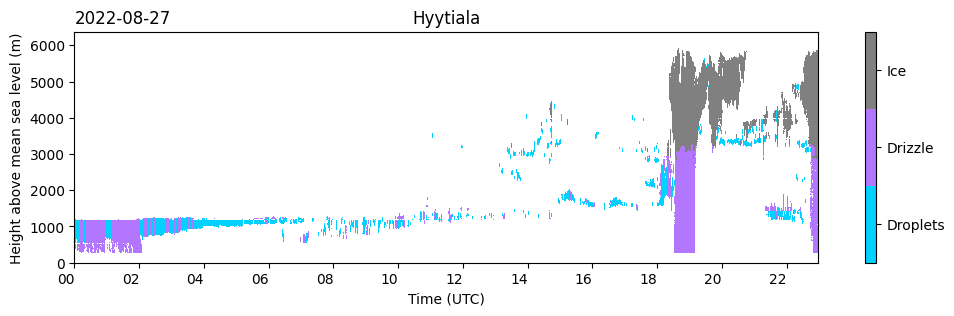

In [11]:
plot_raw(classification_file, categorize_file)

***

##### *plot_filters* shows raw and processed data.

***

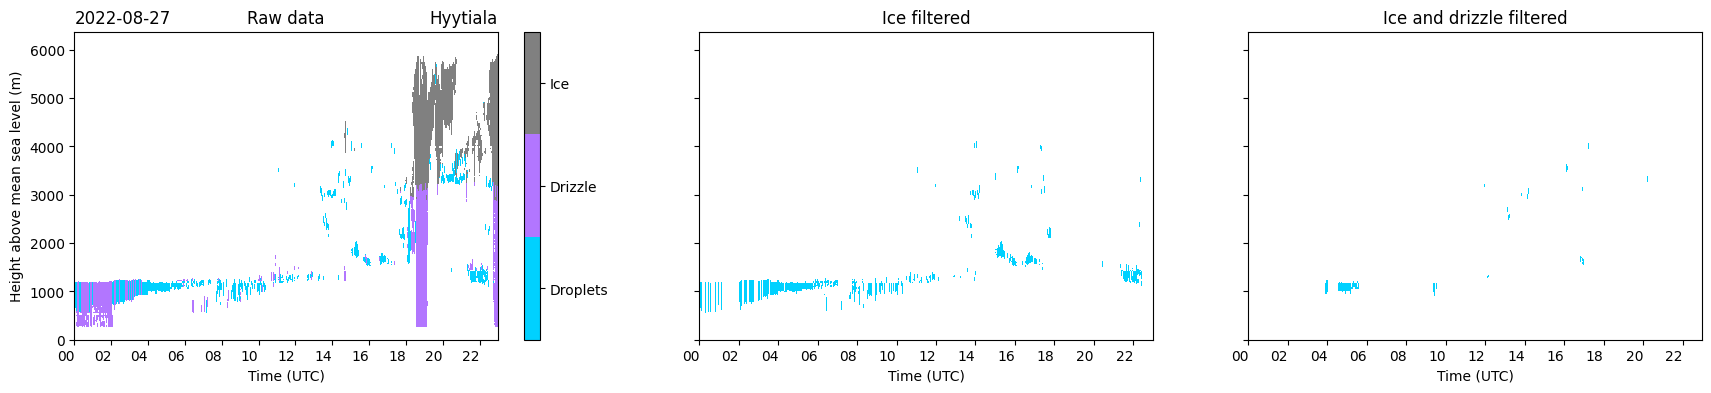

In [12]:
plot_filters(classification_file, categorize_file)

## 5. Visualize cloud base updraft product

In [13]:
!ls Products_hyytiala/Updraft

output_1_hyytiala output_2_hyytiala output_3_hyytiala


In [14]:
!ls Products_hyytiala/Updraft/output_3_hyytiala

20140301_hyytiala_updraft_3.nc 20220529_hyytiala_updraft_3.nc
20140304_hyytiala_updraft_3.nc 20220530_hyytiala_updraft_3.nc
20140306_hyytiala_updraft_3.nc 20220627_hyytiala_updraft_3.nc
20140307_hyytiala_updraft_3.nc 20220628_hyytiala_updraft_3.nc
20140406_hyytiala_updraft_3.nc 20220629_hyytiala_updraft_3.nc
20140407_hyytiala_updraft_3.nc 20220826_hyytiala_updraft_3.nc
20140412_hyytiala_updraft_3.nc 20220827_hyytiala_updraft_3.nc
20140413_hyytiala_updraft_3.nc 20220828_hyytiala_updraft_3.nc
20140414_hyytiala_updraft_3.nc 20220829_hyytiala_updraft_3.nc
20140421_hyytiala_updraft_3.nc 20220830_hyytiala_updraft_3.nc
20220528_hyytiala_updraft_3.nc


In [15]:
path = 'Products_hyytiala/Updraft/'

# output 1 (cloud base updraft for the raw data)

updrafts_1 = path + 'output_1_hyytiala/20220827_hyytiala_updraft_1.nc'

# output 2 (cloud base updraft with ice cloud filtered)

updrafts_2 = path + 'output_2_hyytiala/20220827_hyytiala_updraft_2.nc'

# output 3 (cloud base updraft with ice cloud and drizzle filtered)

updrafts_3 = path + 'output_3_hyytiala/20220827_hyytiala_updraft_3.nc'

## 6. Visualize the outputs

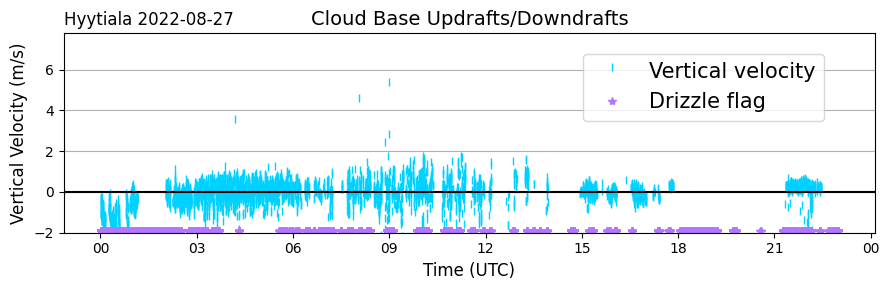

In [16]:
plot_updrafts(classification_file, updrafts_2)

***

*plot_kde* visualizes probability density functions for all the cases derived from the *generate_updraft*. 


***

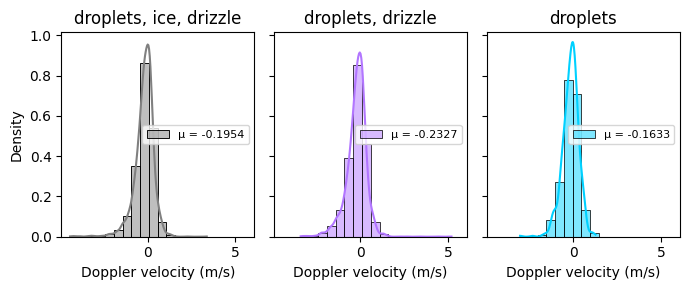

In [17]:
plot_kde(updrafts_1, updrafts_2, updrafts_3)